<a href="https://colab.research.google.com/github/nguyenphucloc22/test/blob/main/Nutritional_Needs_Recommendation_Based_on_Fuzzy_Logic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=470914bcca30b3bd6d1d478269bcb3445330db67c1e78717179f019324baa541
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


2275.3526514773016


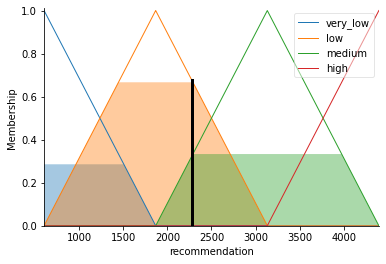

In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline
x_age=np.linspace(5,40,num=100)
x_bmi_category=np.linspace(0,30,num=100)
x_recommendation=np.linspace(600,4400,num=4400)

age=ctrl.Antecedent(x_age,"age")
bmi_category=ctrl.Antecedent(x_bmi_category,"bmi_category")
recommendation=ctrl.Consequent(x_recommendation,"recommendation")
names_age=['adult','young']
names_bmi_category=['skinny','thin','normal','overweight','obesity']
names_recommendation=['very_low','low','medium','high']
recommendation['very_low']=fuzz.trimf(recommendation.universe,[600,1000,1000])
recommendation["low"]=fuzz.trimf(recommendation.universe,[800,1500,1500])
recommendation["medium"]=fuzz.trimf(recommendation.universe,[1500,2200,2800])
recommendation["high"]=fuzz.trimf(recommendation.universe,[2200,4400,4400])

age.automf(names=names_age)
bmi_category.automf(names=names_bmi_category)
recommendation.automf(names=names_recommendation)

rule1 = ctrl.Rule(age['adult'] & bmi_category['skinny'],recommendation['high'])
rule2 = ctrl.Rule(age['adult'] & bmi_category['thin'],recommendation['medium'])
rule3 = ctrl.Rule(age['adult'] & bmi_category['normal'],recommendation['medium'])
rule4 = ctrl.Rule(age['adult'] & bmi_category['overweight'],recommendation['very_low'])
rule5 = ctrl.Rule(age['adult'] & bmi_category['obesity'],recommendation['very_low'])

rule6 = ctrl.Rule(age['young'] & bmi_category['skinny'],recommendation['high'])
rule7 = ctrl.Rule(age['young'] & bmi_category['thin'],recommendation['high'])
rule8 = ctrl.Rule(age['young'] & bmi_category['normal'],recommendation['medium'])
rule9 = ctrl.Rule(age['young'] & bmi_category['overweight'],recommendation['low'])
rule10 = ctrl.Rule(age['young'] & bmi_category['obesity'],recommendation['very_low'])

system_ctrl=ctrl.ControlSystem(rules=[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10])
system=ctrl.ControlSystemSimulation(system_ctrl)

system.input['age'] = 30
system.input['bmi_category'] = 20
system.compute()
print(system.output['recommendation'])
recommendation.view(sim=system)

